## <center>CITS5508 Lab sheet 2: Classification on Japanese Forest Data</center>

**Name: Samuel Heath**<br>
**Student number: 27125083**<br>
**Date created:** March 11th 2019<br>
**Last modified:** March 22th 2019<br>

A brief description about the work done in this lab sheet...


## 1. Initialisation and File I/O

A brief description about the task for this part ...

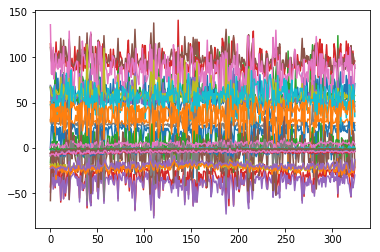

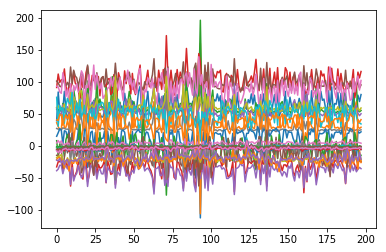

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the training and testing datasets
training_set = pd.read_csv('training.csv')
testing_set = pd.read_csv('testing.csv')

testing_set.plot(legend=False)
training_set.plot(legend=False)
plt.show()

In [5]:
# Display what the raw data stored looks like
training_set.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


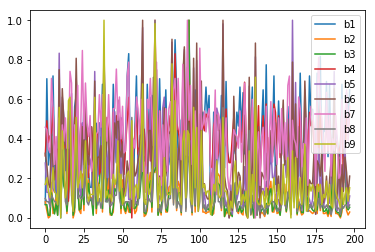

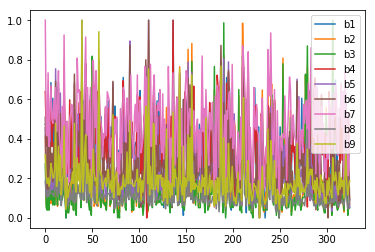

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.407739,0.118668,0.111925,0.401772,0.272821,0.320221,0.430600,0.126097,0.188410
std,0.179994,0.132093,0.116205,0.125463,0.229493,0.215198,0.183398,0.147176,0.165884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.281690,0.022222,0.033557,0.324153,0.092593,0.153846,0.305882,0.049180,0.084746
50%,0.366197,0.048148,0.067114,0.385593,0.203704,0.269231,0.435294,0.065574,0.135593
75%,0.517606,0.190741,0.147651,0.489407,0.388889,0.442308,0.552941,0.098361,0.220339
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Remove unneeded features from the data
training_set = training_set[list(filter(lambda x: 'pred_minus' not in x, training_set.columns.get_values()))]
testing_set = testing_set[list(filter(lambda x: 'pred_minus' not in x, testing_set.columns.get_values()))]

# Redisplay the values
training_set.plot()
testing_set.plot()

plt.show()

training_set.describe()

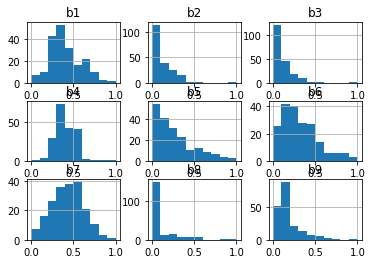

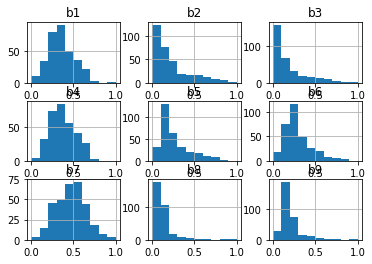

In [40]:
training_set.hist()
testing_set.hist()
plt.show()

class
d    54
h    48
o    37
s    59
dtype: int64


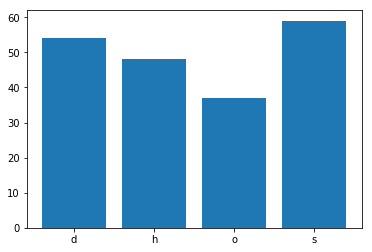

In [44]:
print(training_set.groupby('class').size())
plt.bar(x=training_set.sort_values('class')['class'].unique(), height=training_set.groupby('class').size())

plt.show()

From the above bar graph we can see that the sizes of the grouped classes the dataset are not particularly even as the o-class only has 37 instances and so, however the dataset is not imbalanced.

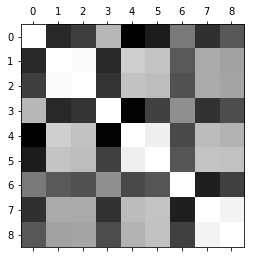

In [47]:
from sklearn.preprocessing import MinMaxScaler

digit_columns = list(filter(lambda x: 'class' not in x, training_set.columns))

scaler = MinMaxScaler()
# MinMax Scale Testing Set
testing_set[digit_columns] = scaler.fit_transform(testing_set[digit_columns])

# MinMax Scale Training Set and display
training_set[digit_columns] = scaler.fit_transform(training_set[digit_columns])
# Make a copy of the training set
training_copy = training_set.copy()
training_set.describe()

from pandas.plotting import scatter_matrix

corr_matrix = training_set.corr()
plt.matshow(corr_matrix, cmap=plt.cm.gray)

There looks as though there may be some relationship present between b1, b2, and b4, as well as b4 and b5, and b8 and b9.

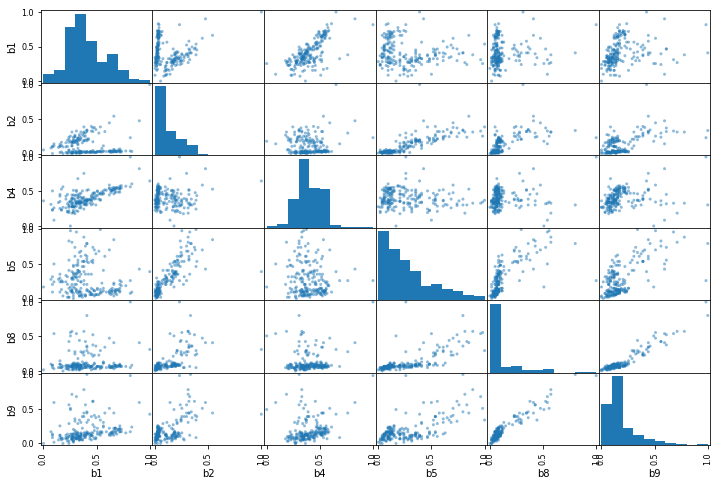

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [57]:
scatter_matrix(training_set[["b1","b2","b4","b5","b8","b9"]], figsize=(12,8))
plt.show()

print(training_set.loc(training_set["class"] == 'd').plot())

a:\libraries\documents\github\handson-ml\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

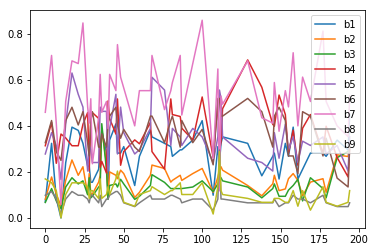

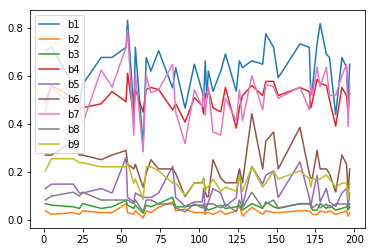

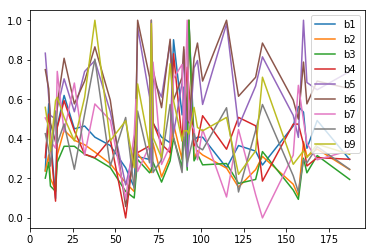

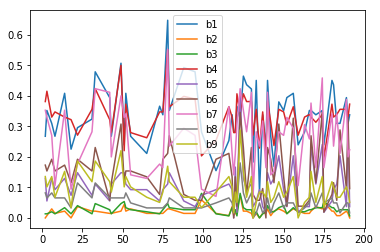

In [69]:
from sklearn.linear_model import SGDClassifier

grouped = training_set.groupby("class").plot(legend=True)

clf = SGDClassifier(loss="log", penalty="l2", max_iter=5)
clf.fit(training_set[["b1"]], training_set["class"])

In [ ]:
from sklearn.model_selection import cross_val_predict